# 1.1.5. Regression

기계학습(machine learning)의 지도학습(Supervised Learning)은 연속적인 값을 출력하는 회귀(Regression),<br><br>
입력 데이터가 어떤 종류의 값인지 표식하는 분류(Classification) 두가지로 나눌 수 있습니다.<br><br>
회귀란 독립변수(x)와 종속변수(y) 간의 상관관계를 모델링하는 기법을 말합니다.<br><br>
예를 들어 아파트의 방 개수, 방 크기, 주변 학군 등 여러 독립변수에 따라 <br><br>
아파트 가격이라는 종속변수가 어떤 관계를 나타내는지 모델링하고 예측하는 것입니다.<br><br>
회귀 모델을 수식으로 표현하면 아래와 같습니다.<br><br>
$ Y = W_{1}X_{1} + W_{2}X_{2} + \dots + W_{n}X_{n} $<br><br>
$Y$는 종속변수인 아파트 가격, $X$는 방 개수, 방 크기, 주변 학군 등의 독립변수를 의미합니다.<br><br>
그리고 $W$는 이 독립변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)입니다. <br><br>
머신러닝 관점에서 보면 독립변수는 피처(feature)에 해당하고 종속변수는 결정 값입니다.<br><br>
머신러닝 회귀 분석의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것 입니다.

- 회귀 모델

<img src='./img/regression.png'>

<img src='./img/regression2.png'>

# 1.1.5.1. Simple Linear Regression

종속변수(Y)와 하나의 독립변수(X)와의 선형 상관관계를 모델링 하는 것을 Simple Linear Regression 이라고 합니다.<br><br>
$Y = W_{0} + W_{1}X_{1}$<br><br>
위와 같은 식으로 나타낼 수 있습니다.<br><br>
키에 따른 몸무게, 공부시간에 따른 성적, 방의 개수에 따른 집값 등을 단순 선형 회귀의 예로들 수 있습니다.<br><br>

- **Data Load**

In [158]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target

In [160]:
X = np.array(bostonDF['RM'])
y = np.array(bostonDF['PRICE'])

print(X.shape, y.shape)

(506,) (506,)


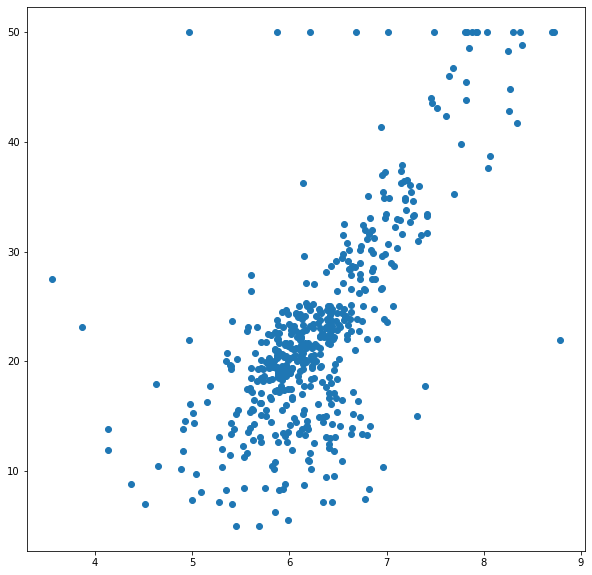

In [185]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.scatter(X, y)
plt.show()

- **Data Split**

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 1) (152, 1) (354, 1) (152, 1)


- **Model Fitting**

In [165]:
model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5405071537090413

- **R2_score**<br><br>
    - $R^{2} = 1 - \frac{SSR}{SST}$<br><br>
      $SSR = \sum{(y_{i} - \hat{y_{i}})^{2}}$<br><br>
      $SST = \sum{(y_{i} - \bar{y})^{2}}$      

In [187]:
pred = model.predict(X_test)

SSR = np.sum((y_test - pred)**2)
SST = np.sum((y_test - np.mean(y_test))**2)

R2 = 1 - SSR / SST

R2

0.5405071537090413

- **Visualization**

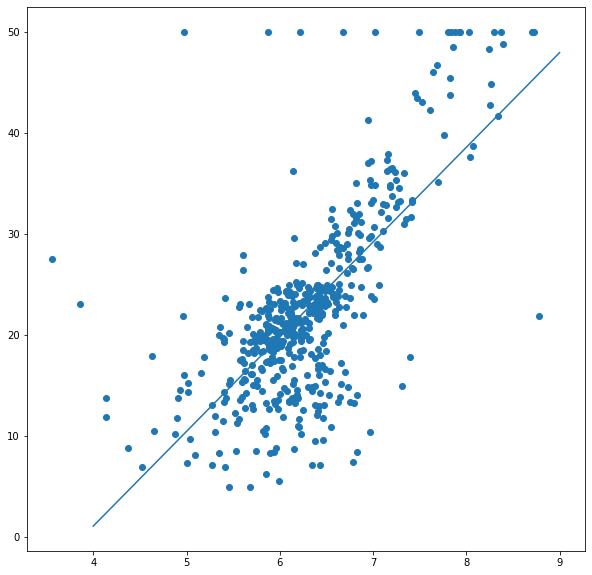

In [186]:
plt.figure(figsize=[10, 10])
plt.scatter(X, y)
plt.plot([4, 9 ], [(4 * model.coef_ + model.intercept_)[0][0], (9 * model.coef_ + model.intercept_)[0][0]])
plt.show()

# 1.1.5.2. Multiple Linear Regression

Multiple Linear Regression 은 한 개의 종속변수(Y)에 여러개의 독립변수(X)가 대응되는 형태 입니다.<br><br>
집 값은 방의 개수만으로 예측할 수 있는 간단한 문제가 아닙니다.<br><br>
$ Y = W_{1}X_{1} + W_{2}X_{2} + \dots + W_{n}X_{n} $<br><br>


In [191]:
y = bostonDF['PRICE']
X = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

1. CRIM : 지역별 범죄 발생률<br><br>
2. ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율<br><br>
3. INDUS : 비상업 지역 넓이 비율<br><br>
4. CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1, 아니면 0)<br><br>
5. NOX : 일산화질소 농도<br><br>
6. RM : 거주할 수 있는 방 개수<br><br>
7. AGE : 1940년 이전에 건축된 소유 주택의 비율<br><br>
8. DIS : 5개 주요 고용센터까지의 가중 거리<br><br>
9. RAD : 고속도로 접근 용이도<br><br>
10. TAX : 10,000 달러당 재산세율<br><br>
11. PTRATIO : 지역의 교사와 학생 수 비율<br><br>
12. B : 지역의 흑인 거주 비율<br><br>
13. LSTAT : 하위 계층의 비율<br><br>
14. PRICE : 본인 소유의 주택 가격(중앙값)<br><br>

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [204]:
model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7121403251584377

# 1.1.5.3. Multicollinearity

Multicollinearity(다중공선성) 이란 회귀 모형에서 독립변수간 상관관계가 높아 종속변수를 예측하는데 발생하는 문제를 말합니다.<br><br>
다중공선성이 발생하면 회귀계수의 분산이 증가해 모델이 불안정해지고 과적합이 발생할 수 있다.<br><br>
다중공선성이 있다고 판단하는 기준은 독립변수간 상관관계가 0.9이상 이거나, 공차한계 0.1미만, 분산팽창요인이 10 이상 입니다.<br><br>
방지 방법은 대표적으로 세가지가 있습니다.<br>
- 변수 선택법(Feature Selection)
- 정규화(Regularization)
- 주성분 분석(Principal Component Analysis)


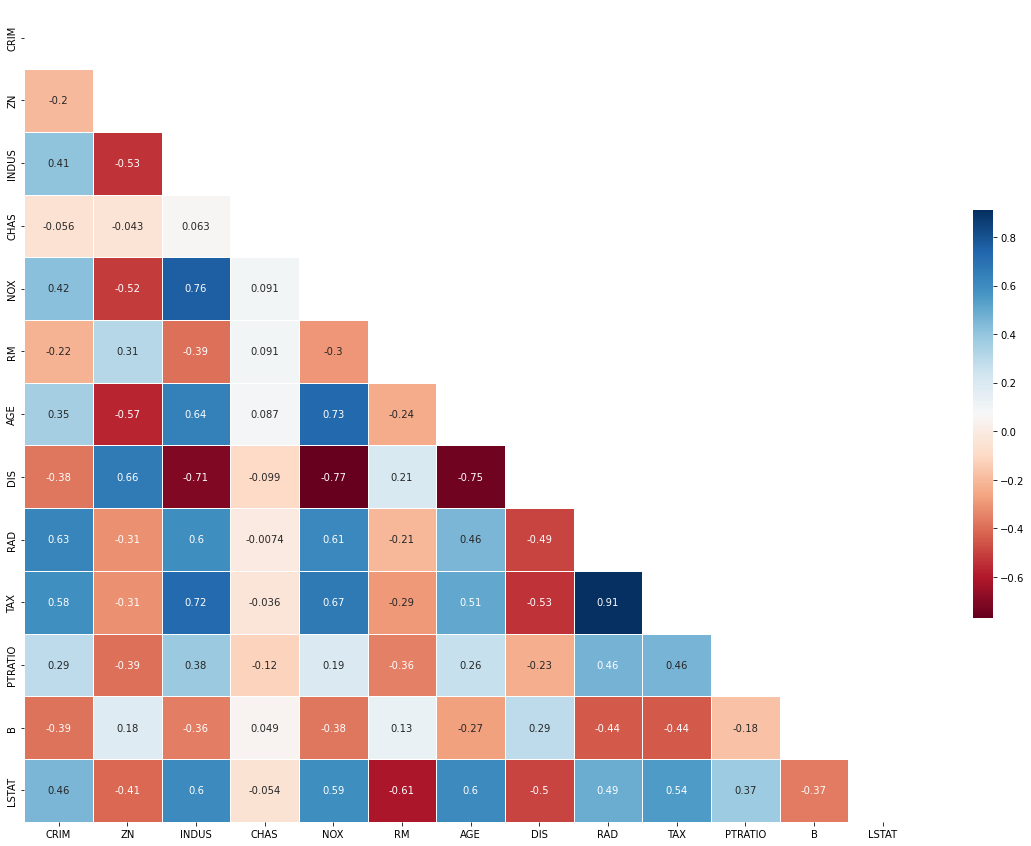

In [219]:
plt.figure(figsize=(20, 15))

mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), 
            annot=True, 
            mask = mask,
            cmap='RdBu',
            linewidths=.5,
            cbar_kws={'shrink': .5})

plt.show()

- 변수 선택법

In [216]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:35:17   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- 정규화

In [217]:
# Ridge

model = Ridge(alpha=10)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7148426614379217

In [201]:
# Lasso

model = Lasso(alpha=0.05)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7173139006958944

In [218]:
# ElasticNet

model = ElasticNet(alpha=0.05, l1_ratio=0.3)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7147750885312789